In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# For text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# pip install -U spacy
# import spacy
# from spacy.lang.en import English

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

# Text - visualization
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
#from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import CountVectorizer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
simple_train=['call you tonight @@! , & %','call me a cab', 'please call me .. please']

In [3]:
# Instantiate the model with defaul parameters
vect = CountVectorizer()

In [5]:
# learn the vocabulary of the training data (occurs in-place)
# lower case (default)
# stop_words = none (default)| 'english'
# no duplicates
# sorted
vect.fit(simple_train)
print(vect.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [6]:
# get the fitted vocabulary / All the features
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [7]:
# transform the training data into a 'document-term matrix'
dtm = vect.transform(simple_train)

In [8]:
dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [9]:
# convert sparse matrix to a dense matrix
dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [10]:
# Get vocabulary and document-term frequency together
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [60]:
# Vectorization is the general process of turning a collection of text 
# documents into numerical feature vectors. This specific strategy 
# (tokenization, counting and normalization) is called the BAG OF WORDS or
# "BAG OF n-grams" representation.
# Documents are described by word occurances while completely ignoring the 
# relative position information of the words in the doucments

In [11]:
# check the type of document-term matrix
type(dtm)

scipy.sparse.csr.csr_matrix

In [12]:
# see the content of document-term matrix
print(dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [13]:
# example text for testing the model
test = [' please dont call me ']

In [14]:
# build document-term matrix for the test data
test_dtm = vect.transform(test)

In [15]:
test_dtm

<1x6 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [16]:
# notice the token don't does not appear in the dtm
# bcoz the token "don't" does not appear in the vocabulary
test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [17]:
# Get vocabulary and document-term frequency together
pd.DataFrame(test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [18]:
# Summary
# vect.fit(train) --- learns the vocabulary of the training data
# vect.transform(transform) --- uses fitted vocabulary to build a document-term
#                               matrix
# vect.transform(test) --- uses fitted vocabulary to build document-term matrix 
#                          from the testing data (and ignores the tokens not in 
#                          fitted vocabulary
# 

In [18]:
sms = pd.read_csv('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course4-NLP/datasets by Bhupendra/dataset/sms.tsv', header=None, sep='\t',names=['label', 'message'])

In [19]:
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [20]:
# get the class distribution
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [21]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham': 0, 'spam': 1})

In [22]:
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [23]:
# save the positive SMS
X_ham  = sms[(sms.label_num == 0)].message
X_spam = sms[(sms.label_num == 1)].message

In [24]:
X_spam[:5]

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

In [25]:
# define X and y for use with CountVectorizer
# it is important you send 1 dimensional object to CountVectorizer, which
# it will use to convert to 2-dimensionsal objects
X = sms.message
y = sms.label_num

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [26]:
# split X and y into training ans testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [28]:
X_train[:3]

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
Name: message, dtype: object

In [29]:
# vectorizing the dataset

# instantiate the vectorizer
vect = CountVectorizer()

In [30]:
# learn training data vocabulary, then use it to create the fitted vocabulary
# and create the document-term matrix
# 2-step process
%time
vect.fit(X_train)                     # create the fitted vocabulary, BoW

X_train_dtm = vect.transform(X_train) # create the document-term matrix, vectorization

Wall time: 0 ns


In [31]:
# Same can be achieved with 1 step also
# FASTER
%time
X_train_dtm = vect.fit_transform(X_train)

Wall time: 0 ns


In [32]:
 #print(vect.get_feature_names())

In [33]:
X_train_dtm
# we  can't print dtm so convert to toarray()

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [18]:
# this will print the sparse matrix, only the 1s
# print(X_train_dtm)

In [34]:
np.set_printoptions(edgeitems=12)

In [35]:
# this will print the dense matrix, both 1s and 0s
X_train_dtm.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0,

In [36]:
# Number of rows = number of training samples,
# number of columns = features
X_train_dtm.shape

(4179, 7456)

In [37]:
# transform testing data (using fitted vocabulary) into a document-term maxtri
# with test data, we do not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [38]:
# Build Model
# Multinomial Naive Bayes classifier is suitable for classification with 
# DISCRETE features (word counts for text classification)
# The multinomial distribution normally requires integer feature counts.
# However, in practice, fractional counts such as tf-idf may also work
nb = MultinomialNB()

In [39]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
%time nb.fit(X_train_dtm, y_train)

Wall time: 14.1 ms


MultinomialNB()

In [40]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [41]:
y_pred_class.shape

(1393,)

In [42]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [43]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

When u set up production environment,the new samples will need to be transformed using the same vectorizer.Means save vectorizer as a file somewhere. U can pickle this vectorizer means u can dump vectorizer onto the disk. AT the time of prediction u r going to load pickled file then transform ur testing samples.

In [44]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  11,  174]], dtype=int64)

Class imbalance is not really that much problem here. Correct predictions for 1 are 174 and for 0 are 1203.
Incorrect predictions r very less.
As a data scientist for NLP domain,We r going to focus on wrong predictions.

In [45]:
# Label 1 - POSITIVE (Spam)
# Label 0 - NEGATIVE (Ham)
# [[TN,  FP ],
#  [FN , TP]]
# FP - Falsely 'predicted' POSITIVE
# FN - Falsely 'predicted' NEGATIVE

In [46]:
# FALSE POSITIVE
X_test[(y_test==0) & (y_pred_class ==1)]          # (y_test==0) is False and (y_pred_class ==1) is positive

# Same as
# X_test[y_pred_class > y_test==0]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [47]:
# FALSE NEGATIVE
X_test[(y_test==1) & (y_pred_class ==0)]

# Same as
# X_test[y_pred_class < y_test==0]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [48]:
# Calculate the predicted proobabilities for X_test
nb.predict_proba(X_test_dtm)[:20]
# predict_proba() function will return u the probability of testing samples and how close those samples were to the class of
# 0 and class of 1.
# ex: in first sample is having probability of .97 that it belongs to class of 0, same sample has probability of .00287 to
# class1(ie low probability).
# If u get (border-line cases)probability of .53 and .47 for class 0 and class1 resp, those samples u have focus as how and why they r not 
# predicting right or wrong. to resolve this U can add more/right training samples so that probabilities should be higher. 
# Solution is not yet been found by Google as we still get spam emails in ham or ham/good emails in spam/junk folder.

array([[9.97122551e-01, 2.87744864e-03],
       [9.99981651e-01, 1.83488846e-05],
       [9.97926987e-01, 2.07301295e-03],
       [9.79980193e-01, 2.00198073e-02],
       [1.00000000e+00, 1.34709013e-11],
       [1.00000000e+00, 1.56340395e-10],
       [9.98073826e-01, 1.92617424e-03],
       [9.99049053e-01, 9.50947496e-04],
       [9.99961584e-01, 3.84158042e-05],
       [9.99999987e-01, 1.30241278e-08],
       [9.99997866e-01, 2.13391405e-06],
       [9.91220365e-01, 8.77963508e-03],
       [9.99549836e-01, 4.50164102e-04],
       [9.99806644e-01, 1.93355944e-04],
       [9.99995794e-01, 4.20562786e-06],
       [9.99988173e-01, 1.18270971e-05],
       [2.97643548e-07, 9.99999702e-01],
       [9.99956836e-01, 4.31642834e-05],
       [1.20067246e-21, 1.00000000e+00],
       [9.99812840e-01, 1.87160314e-04]])

In [49]:
nb.predict_proba(X_test_dtm).shape

(1393, 2)

In [50]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
y_pred_proba = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

array([2.87744864e-03, 1.83488846e-05, 2.07301295e-03, 2.00198073e-02,
       1.34709013e-11, 1.56340395e-10, 1.92617424e-03, 9.50947496e-04,
       3.84158042e-05, 1.30241278e-08, 2.13391405e-06, 8.77963508e-03,
       ..., 6.97142164e-01, 1.18353176e-06, 3.14006947e-13,
       7.70480835e-05, 1.19532862e-03, 5.58737991e-04, 7.35701497e-04,
       2.63759215e-04, 3.12623759e-05, 1.09026171e-06, 1.00000000e+00,
       3.98279868e-09])

In [51]:
print(y_test.shape)
print(y_pred_proba.shape)

(1393,)
(1393,)


In [52]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9866431000536962

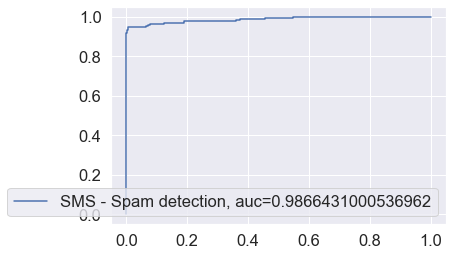

In [53]:
import matplotlib.pyplot as plt
y_pred_proba = nb.predict_proba(X_test_dtm)[:,1]

# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="SMS - Spam detection, auc="+str(auc))
plt.legend(loc=4)

# Receiver Operator Characteristic ROC is evaluation technique in ML. We provide labels(y_test) and 
# predicted probabilities(y_pred_proba) to function roc_curve.  

In [54]:
words_ham = ' '.join(X_ham)

In [55]:
# words_ham
type(words_ham)

str

In [56]:
# pip install wordcloud
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     #stopwords = stopwords, 
                     min_font_size = 10).generate(words_ham) 

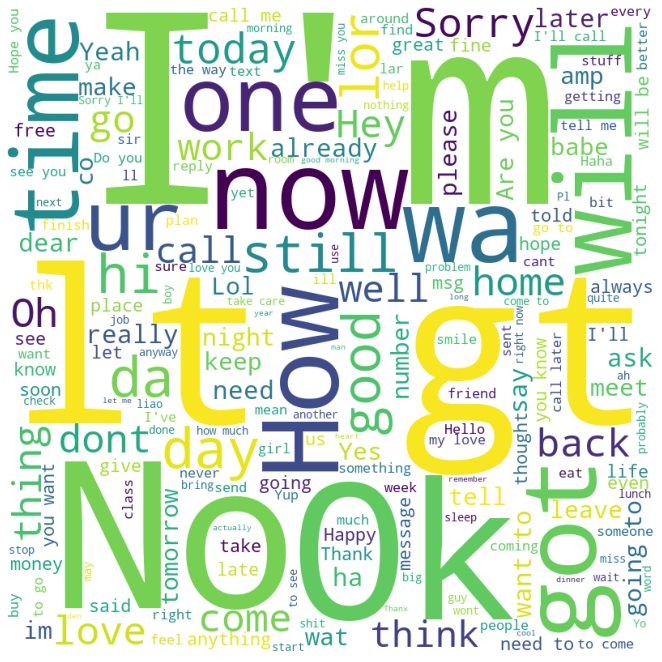

In [57]:
# plot the WordCloud image                        
plt.figure(figsize = (9, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# U should have done preprocessing here ie removal of stopwards, lemmatization as result is not good. Words like it,want 
# doesn't have to do anything  with ham messages or these words r not prominent words to detect ham messages.

In [58]:
metrics.roc_curve(y_test,  y_pred_proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00165563, 0.00248344, 0.00248344, 0.00413907, 0.00413907,
        0.01241722, 0.01490066, 0.0455298 , 0.04801325, 0.06374172,
        0.06374172, 0.07284768, 0.07284768, 0.07698675, 0.07698675,
        0.08360927, 0.08609272, 0.0968543 , 0.09850993, 0.12417219,
        0.12417219, 0.16887417, 0.1705298 , 0.18046358, 0.18294702,
        0.18874172, 0.18874172, 0.19039735, 0.19039735, 0.22019868,
        0.2218543 , 0.22268212, 0.22433775, 0.25413907, 0.25662252,
        0.28145695, 0.28311258, 0.31705298, 0.32533113, 0.36175497,
        0.36175497, 0.37334437, 0.37334437, 0.3865894 , 0.38824503,
        0.44039735, 0.44205298, 0.45612583, 0.45612583, 0.54718543,
        0.54718543, 0.54884106, 0.55049669, 0.66804636, 0.66970199,
        0.78476821, 0.78642384, 0.87665563, 0.87

In [59]:
# Compare models
# Logistic regression, despite its name is a linear model for classification 
# rather than regression. Also known as "logit regression", Maximum-entropy
# classification (MaxEnt) or log-linear classifier.
# 
logreg = LogisticRegression(solver='lbfgs', max_iter=500)

In [60]:
# train the model
%time logreg.fit(X_train_dtm, y_train)

# slower than NB

Wall time: 234 ms


LogisticRegression(max_iter=500)

In [61]:
# Predict using X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [62]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [63]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
# probabilities are well caliberated
print(logreg.predict_proba(X_test_dtm)[:20])

y_pred_proba = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

[[9.90406227e-01 9.59377345e-03]
 [9.97043380e-01 2.95661985e-03]
 [9.95475755e-01 4.52424455e-03]
 [9.92496029e-01 7.50397075e-03]
 [9.88041278e-01 1.19587220e-02]
 [9.99199488e-01 8.00511904e-04]
 [9.91651254e-01 8.34874620e-03]
 [9.96494130e-01 3.50587025e-03]
 [9.95270941e-01 4.72905934e-03]
 [9.99142567e-01 8.57432928e-04]
 [9.98238894e-01 1.76110649e-03]
 [9.95093694e-01 4.90630625e-03]
 [9.94636512e-01 5.36348814e-03]
 [9.83307784e-01 1.66922162e-02]
 [9.95164392e-01 4.83560812e-03]
 [9.97816018e-01 2.18398199e-03]
 [1.03590127e-03 9.98964099e-01]
 [9.83251358e-01 1.67486418e-02]
 [4.18917218e-02 9.58108278e-01]
 [9.77539807e-01 2.24601932e-02]]


array([9.59377345e-03, 2.95661985e-03, 4.52424455e-03, 7.50397075e-03,
       1.19587220e-02, 8.00511904e-04, 8.34874620e-03, 3.50587025e-03,
       4.72905934e-03, 8.57432928e-04, 1.76110649e-03, 4.90630625e-03,
       ..., 5.34922899e-02, 3.27521505e-02, 2.11677323e-03,
       1.04431191e-02, 6.75027156e-03, 1.49456404e-02, 1.43877031e-02,
       3.23715779e-03, 5.04095617e-03, 3.13020010e-02, 9.97489617e-01,
       1.19520511e-03])

In [66]:
# array([[9.97122551e-01, 2.87744864e-03],
#        [9.99981651e-01, 1.83488846e-05],
#        [9.97926987e-01, 2.07301295e-03],
#        ...,
#        [9.99998910e-01, 1.09026171e-06],
#        [1.86697467e-10, 1.00000000e+00],
#        [9.99999996e-01, 3.98279868e-09]])

# in DS, it is not about the FINAL classification, for ML practitioner it is about the PROCESS which led to the classification

the process of cleaning up, process of data acquisition, process of sampling, process of how do u validate ur data(is data relevant/timely/consistent) and applying some of these statistical tools. Finally When it comes to ML, process is R u choosing right ML model, did u go thro' the proper evaluation technique. evaluation metric r Confusion matrix,accuarcy score, f1 score, roc curve, train-test split .

In [64]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9936280651512441

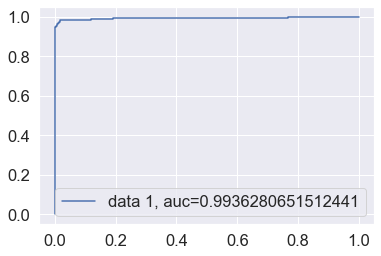

In [65]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test_dtm)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [66]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  16,  169]], dtype=int64)

In [67]:
# Examine a model

# Get all the tokens/features
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7456

In [68]:
X_train_tokens[0:10]

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400']

In [69]:
X_train_tokens[-10:]

['zed',
 'zeros',
 'zhong',
 'zindgi',
 'zoe',
 'zoom',
 'zouk',
 'zyada',
 'èn',
 '〨ud']

In [70]:
# naive bayes counts the number of time each token appears in each class
# why ?
# ans : conditional probability
# trailing _ attribute ... means scikit learn creates this during the 
# training process (fit process)
nb.feature_count_

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., ...,
         1.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 5., 23.,  2.,  1.,  1.,  2.,  0.,  4.,  3.,  1.,  2.,  1., ...,
         0.,  1.,  6.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.]])

In [71]:
type(nb.feature_count_)

numpy.ndarray

In [72]:
nb.feature_count_.shape

(2, 7456)

In [73]:
# capture the ham & spam rows from the array
ham_token_count  = nb.feature_count_[0, :]
spam_token_count = nb.feature_count_[1, :]

In [74]:
# create a dataframe
tokens = pd.DataFrame({'tokens': X_train_tokens, 'ham': ham_token_count, 'spam': spam_token_count})

In [75]:
tokens.head()

,tokens,ham,spam
0,00,0.0,5.0
1,000,0.0,23.0
2,008704050406,0.0,2.0
3,0121,0.0,1.0
4,01223585236,0.0,1.0


In [76]:
# display 10 random tokens
tokens.sample(10, random_state=6)

,tokens,ham,spam
6977,very,64.0,2.0
4521,nasty,1.0,1.0
6999,villa,0.0,1.0
1266,beloved,1.0,0.0
6522,textoperator,0.0,2.0
1035,arng,2.0,0.0
250,1013,0.0,1.0
5703,scores,1.0,1.0
4504,nahi,2.0,0.0
4036,long,35.0,0.0


In [77]:
# naive bayes counts the number of observations in each class
nb.class_count_

array([3617.,  562.])

In [78]:
tokens['ham']  = tokens.ham + 1
tokens['spam'] = tokens.spam + 1

tokens.sample(5, random_state=6)

,tokens,ham,spam
6977,very,65.0,3.0
4521,nasty,2.0,2.0
6999,villa,1.0,2.0
1266,beloved,2.0,1.0
6522,textoperator,1.0,3.0


In [79]:
# convert the ham and spam counts into frequencies
tokens['ham']  = tokens.ham/  nb.class_count_[0]
tokens['spam'] = tokens.spam/ nb.class_count_[1]
tokens.sample(5, random_state=6)

,tokens,ham,spam
6977,very,0.017971,0.005338
4521,nasty,0.000553,0.003559
6999,villa,0.000276,0.003559
1266,beloved,0.000553,0.001779
6522,textoperator,0.000276,0.005338


In [80]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam/tokens.ham
tokens.sample(5, random_state=6)

,tokens,ham,spam,spam_ratio
6977,very,0.017971,0.005338,0.297044
4521,nasty,0.000553,0.003559,6.435943
6999,villa,0.000276,0.003559,12.871886
1266,beloved,0.000553,0.001779,3.217972
6522,textoperator,0.000276,0.005338,19.307829


In [81]:
# examine the dataframe sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

# word 'claim' 572% likely will be in spam messages.
# in border line cases, pick those words n see where they r lying, in the spam or ham.

,tokens,ham,spam,spam_ratio
1766,claim,0.000276,0.158363,572.798932
5209,prize,0.000276,0.135231,489.131673
293,150p,0.000276,0.087189,315.361210
6680,tone,0.000276,0.085409,308.925267
3139,guaranteed,0.000276,0.076512,276.745552
...,...,...,...,...
2066,da,0.032900,0.001779,0.054084
5824,she,0.035665,0.001779,0.049891
3244,he,0.047000,0.001779,0.037858
4093,lt,0.064142,0.001779,0.027741


In [82]:
# look up for a specfic token
tokens.loc[tokens['tokens'] == 'tariff']

,tokens,ham,spam,spam_ratio


In [83]:
# vectorizer tuning
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Stemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

# lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [84]:
# Stopwords from stopwords-json
# https://raw.githubusercontent.com/6/stopwords-json/master/dist/en.json

stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}

In [85]:
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct   = set(punctuation)

In [86]:
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

In [87]:
vect = CountVectorizer(stop_words=stoplist_combined, 
                       token_pattern='(?u)\\b[a-zA-Z]{3,}\\b')

In [88]:
vect

CountVectorizer(stop_words={'!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
                            '+', ',', '-', '.', '/', ':', ';', '<', '=', '>',
                            '?', '@', '[', '\\', ']', '^', '_', '`', 'a', "a's", ...},
                token_pattern='(?u)\\b[a-zA-Z]{3,}\\b')

In [89]:
# learn training data vocabulary, then use it to create the fitted vocabulary
# and create the document-term matrix
# 2-step process
%time
vect.fit(X_train)                     # create the fitted vocabulary
X_train_dtm = vect.transform(X_train) # create the document-term matrix

Wall time: 0 ns


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [90]:
# Number of rows = number of training samples,
# number of columns = features
X_train_dtm.shape

(4179, 5943)

In [91]:
# transform testing data (using fitted vocabulary) into a document-term maxtri
# with test data, we do not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x5943 sparse matrix of type '<class 'numpy.int64'>'
	with 7238 stored elements in Compressed Sparse Row format>

In [92]:
# Build Model
# Multinomial Naive Bayes classifier is suitable for classification with 
# DISCRETE features (word counts for text classification)
# The multinomial distribution normally requires integer feature counts.
# However, in practice, fractional counts such as tf-idf may also work
nb = MultinomialNB()

In [93]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
%time nb.fit(X_train_dtm, y_train)

Wall time: 7.97 ms


MultinomialNB()

In [94]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [95]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9806173725771715

In [96]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1192,   16],
       [  11,  174]], dtype=int64)

In [86]:
# Exercise
# print the word cloud (after the stopwords removal etc)